In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("names_final.csv")

In [3]:
df.head()

,name,village,skill1,skill2,experience
0,vikash,Bandakeri,production helper,guard,I want to be employed as a production helper s...
1,jitendra kumar,Budingod,factory worker,guard,I used to work in the city as a factory worker...
2,anoop singh,Budingod,industry worker,warden,I am a industry worker and things have been di...
3,durganand,Budingod,labor,watchman,I am currently a labor and have been one since...
4,kiran,Bandakeri,machinery handler,labour,I used to work as a machinery handler and roam...


In [4]:
df.shape

(1131, 5)

In [5]:
cols = ['experience', 'skill1']
df = df[cols]

In [6]:
df= df[pd.notnull(df['skill1'])]

In [7]:
df.columns=['experience', 'skill1']

In [8]:
df.head()

,experience,skill1
0,I want to be employed as a production helper s...,production helper
1,I used to work in the city as a factory worker...,factory worker
2,I am a industry worker and things have been di...,industry worker
3,I am currently a labor and have been one since...,labor
4,I used to work as a machinery handler and roam...,machinery handler


In [9]:
df.shape

(1131, 2)

In [10]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

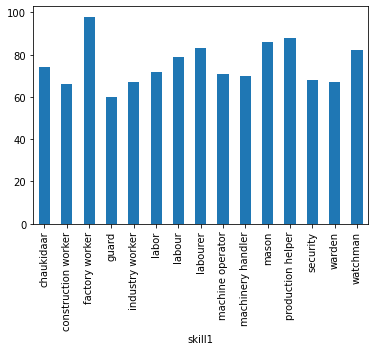

In [11]:
df.groupby('skill1').experience.count().plot.bar(ylim=0)

In [12]:
skill_list = df['skill1'].tolist()
print(skill_list)

['production helper', 'factory worker', 'industry worker', 'labor', 'machinery handler', 'chaukidaar', 'labor', 'guard', 'construction worker', 'machine operator', 'labour', 'security', 'warden', 'production helper', 'security', 'security', 'labor', 'chaukidaar', 'guard', 'construction worker', 'warden', 'mason', 'labour', 'labour', 'guard', 'watchman', 'machine operator', 'mason', 'chaukidaar', 'factory worker', 'factory worker', 'chaukidaar', 'machinery handler', 'labor', 'watchman', 'labourer', 'labour', 'machinery handler', 'warden', 'watchman', 'factory worker', 'production helper', 'labourer', 'labor', 'warden', 'guard', 'watchman', 'factory worker', 'labor', 'labor', 'mason', 'labourer', 'construction worker', 'guard', 'industry worker', 'mason', 'factory worker', 'industry worker', 'construction worker', 'chaukidaar', 'labor', 'construction worker', 'factory worker', 'labour', 'production helper', 'mason', 'chaukidaar', 'factory worker', 'labourer', 'guard', 'security', 'warden

In [13]:
field = []

field1 = 'construction'
field2 = 'factory worker'
field3 = 'security'
field4 = 'cleaner'

const = ['mason', 'construction worker', 'labourer', 'labor', 'labour']
fact = ['factory worker', 'machine operator', 'industry worker', 'machinery handler', 'production helper']
sec = ['security', 'watchman', 'guard', 'chaukidaar', 'warden']


for i in skill_list:
    if i in const:
        field.append(field1)
    elif i in fact:
        field.append(field2)
    elif i in sec:
        field.append(field3)

In [14]:
print(field)

['factory worker', 'factory worker', 'factory worker', 'construction', 'factory worker', 'security', 'construction', 'security', 'construction', 'factory worker', 'construction', 'security', 'security', 'factory worker', 'security', 'security', 'construction', 'security', 'security', 'construction', 'security', 'construction', 'construction', 'construction', 'security', 'security', 'factory worker', 'construction', 'security', 'factory worker', 'factory worker', 'security', 'factory worker', 'construction', 'security', 'construction', 'construction', 'factory worker', 'security', 'security', 'factory worker', 'factory worker', 'construction', 'construction', 'security', 'security', 'security', 'factory worker', 'construction', 'construction', 'construction', 'construction', 'construction', 'security', 'factory worker', 'construction', 'factory worker', 'factory worker', 'construction', 'security', 'construction', 'construction', 'factory worker', 'construction', 'factory worker', 'cons

In [15]:
f = np.asarray(field)
df['field'] = f

In [16]:
df.head()

,experience,skill1,field
0,I want to be employed as a production helper s...,production helper,factory worker
1,I used to work in the city as a factory worker...,factory worker,factory worker
2,I am a industry worker and things have been di...,industry worker,factory worker
3,I am currently a labor and have been one since...,labor,construction
4,I used to work as a machinery handler and roam...,machinery handler,factory worker


In [17]:
cols = ['experience', 'field']
df = df[cols]

In [18]:
df= df[pd.notnull(df['field'])]

In [19]:
df.columns=['experience', 'field']

In [20]:
df.head()

,experience,field
0,I want to be employed as a production helper s...,factory worker
1,I used to work in the city as a factory worker...,factory worker
2,I am a industry worker and things have been di...,factory worker
3,I am currently a labor and have been one since...,construction
4,I used to work as a machinery handler and roam...,factory worker


In [21]:
df.shape

(1131, 2)

In [22]:
fig = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

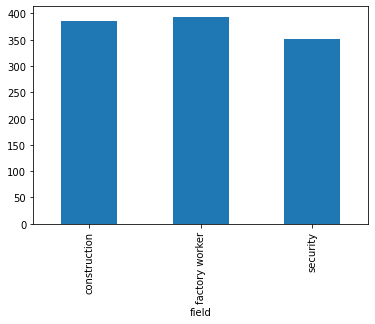

In [23]:
df.groupby('field').experience.count().plot.bar(ylim=0)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 200, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2',
                       ngram_range= (1,2),
                       stop_words ='english')

In [26]:
features = tfidf.fit_transform(df.experience).toarray()

In [27]:
labels = df.field
features.shape

(1131, 7)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['experience'], df['field'], random_state= 0)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [30]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [31]:
print(clf.predict(count_vect.transform(['I want to be employed as a production helper'])))

['factory worker']


In [32]:
y_pred = clf.predict(count_vect.transform(X_test))

In [33]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred, labels= df.field, target_names=df['field'].unique()))

                precision    recall  f1-score   support

factory worker       1.00      1.00      1.00       100
  construction       1.00      1.00      1.00       100
      security       1.00      1.00      1.00       100

      accuracy                           1.00    106573
     macro avg       1.00      1.00      1.00    106573
  weighted avg       1.00      1.00      1.00    106573



In [35]:
import pickle
print(clf.predict(count_vect.transform(['I am a mason']))[0])

pickle.dump(count_vect, open('vec_file.pkl', 'wb'))
pickle.dump(clf, open('classifer.model', 'wb'))

construction


In [36]:


from translate import Translator
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
from time import sleep
# Load the model from the file
classifier = pickle.load(open('classifer.model', 'rb'))
count_vect = pickle.load(open('vec_file.pkl', 'rb'))
trans = Translator(from_lang="Kannada", to_lang="English")
sleep_time = 2
# Use the loaded model to make predictions 
def predict(string):
    predstr = string
    length = 5
    str_error = False
    while not str_error:
        
        try:
            translated = trans.translate(predstr)
            # predstr = str(f'{t.text}')
            print(translated)
            print(classifier.predict(count_vect.transform([translated]))[0])
            str_error = True
        except AttributeError:
            pass
        


predict('ನಾನು ಕಾರ್ಖಾನೆಯಲ್ಲಿ ಕೆಲಸ ಮಾಡುತ್ತೇನೆ')

I work in a factory
factory worker


In [38]:
import pandas as pd

df2 = pd.read_csv("openings.csv")
df2 = df2.loc[df2['work'] == 'Construction']
df2.head()

FileNotFoundError: [Errno 2] File openings.csv does not exist: 'openings.csv'

In [5]:
df2.sort_values('monthly pay', ascending=False)
df2.head()

,name,work,area,hourly pay,daily pay,monthly pay
0,Ahead,Construction,Aladakatti,40,280,7000
1,Bird Cycleworks,Security,Aladakatti,60,420,10500
2,AIRTAME,Coolie,Budingod,40,280,7000
3,Axtria,Coolie,Budingod,55,385,9625
4,Abazab,Farming,Aladakatti,50,350,8750


In [7]:
df2 = df2[['name', 'area', 'monthly pay']]
df2.head()

,name,area,monthly pay
0,Ahead,Aladakatti,7000
1,Bird Cycleworks,Aladakatti,10500
2,AIRTAME,Budingod,7000
3,Axtria,Budingod,9625
4,Abazab,Aladakatti,8750
